In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
df = pd.read_csv("Fitness_Classification.csv")

In [ ]:
df.head()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,NaN,2.37,3.97,no,F,1
1,69,186,95,60.8,114.8,7.5,8.77,3.19,0,F,1
2,46,192,103,61.4,116.4,NaN,8.20,2.03,0,F,0
3,32,189,83,60.2,130.1,7.0,6.18,3.68,0,M,1
4,60,175,99,58.1,115.8,8.0,9.95,4.83,yes,F,1


In [ ]:
df.describe()

,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,is_fit
count,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,1840.000000,2000.000000,2000.000000,2000.000000
mean,49.114000,174.53300,83.540500,70.288600,119.908850,7.513315,5.035140,2.999040,0.399500
std,17.926564,14.37175,25.852534,11.846339,14.578032,1.502031,2.864156,1.136383,0.489918
min,18.000000,150.00000,30.000000,45.000000,90.000000,4.000000,0.000000,1.000000,0.000000
25%,34.000000,162.00000,64.000000,62.100000,109.700000,6.500000,2.547500,2.037500,0.000000
50%,49.000000,174.00000,83.000000,70.250000,120.000000,7.500000,5.065000,2.980000,0.000000
75%,65.000000,187.00000,102.000000,78.425000,129.800000,8.600000,7.470000,3.950000,1.000000
max,79.000000,199.00000,250.000000,118.600000,171.200000,12.000000,10.000000,4.990000,1.000000


In [ ]:
df.isna().sum()

,0
age,0
height_cm,0
weight_kg,0
heart_rate,0
blood_pressure,0
sleep_hours,160
nutrition_quality,0
activity_index,0
smokes,0
gender,0


In [ ]:
df["smokes"] = df["smokes"].astype(str).str.lower()
df["smokes"] = df["smokes"].replace({"si": 1, "sí": 1, "yes": 1, "1": 1,"no": 0, "0": 0}).astype(float)

/tmp/ipython-input-3240767050.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["smokes"] = df["smokes"].replace({"si": 1, "sí": 1, "yes": 1, "1": 1,"no": 0, "0": 0}).astype(float)


In [ ]:
df["gender"] = df["gender"].replace({"M": 1, "F": 0})

/tmp/ipython-input-3045460356.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["gender"] = df["gender"].replace({"M": 1, "F": 0})


In [ ]:
df = df.fillna(df.mean(numeric_only=True))

In [ ]:
print("Dataset limpio:")
df.head()


Dataset limpio:


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender,is_fit
0,56,152,65,69.6,117.0,7.513315,2.37,3.97,0.0,0,1
1,69,186,95,60.8,114.8,7.500000,8.77,3.19,0.0,0,1
2,46,192,103,61.4,116.4,7.513315,8.20,2.03,0.0,0,0
3,32,189,83,60.2,130.1,7.000000,6.18,3.68,0.0,1,1
4,60,175,99,58.1,115.8,8.000000,9.95,4.83,1.0,0,1


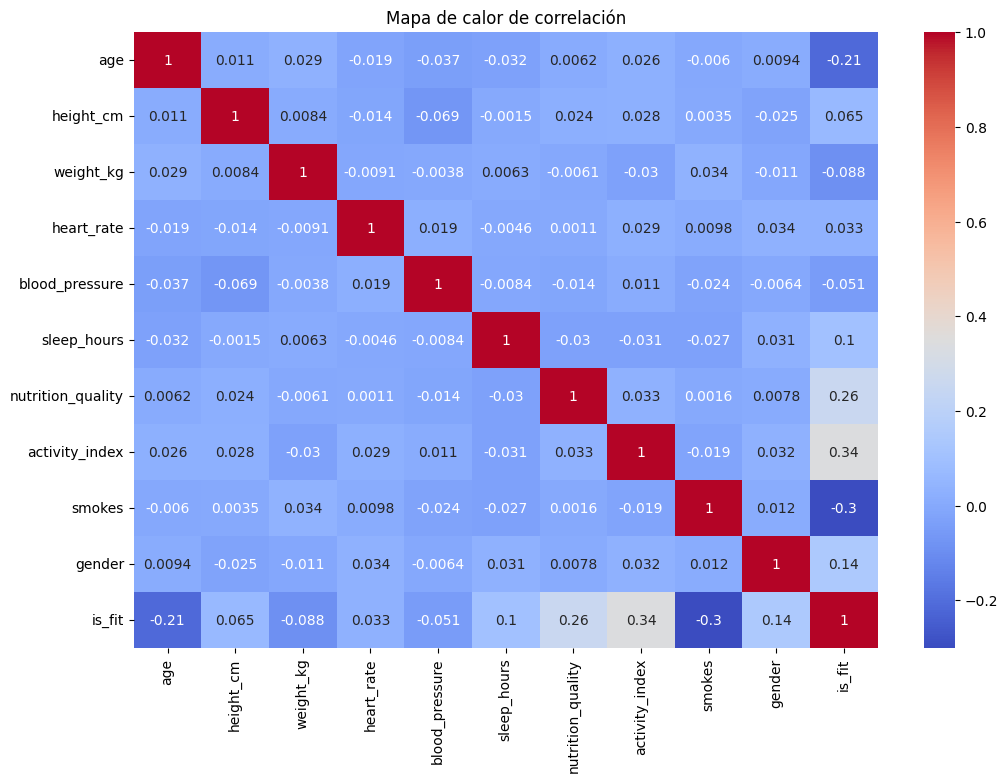

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Mapa de calor de correlación")
plt.show()

In [ ]:
X = df.drop("is_fit", axis=1)
y = df["is_fit"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [ ]:
y_pred = modelo.predict(X_test)

print("Accuracy del modelo:", accuracy_score(y_test, y_pred))


Accuracy del modelo: 0.7375


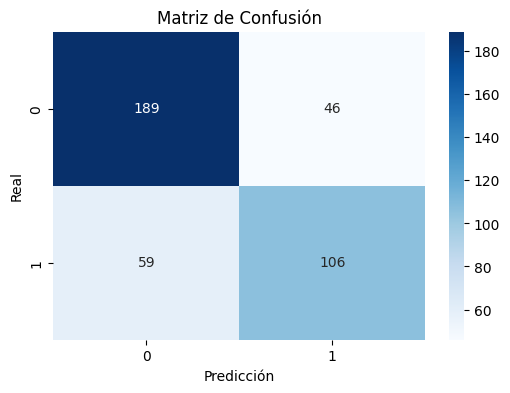

In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()

In [ ]:
ejemplo = X_test.iloc[0:1]
print("Ejemplo de predicción:")
print("Datos:", ejemplo)
print("Predicción:", modelo.predict(ejemplo)[0])

Ejemplo de predicción:
Datos:       age  height_cm  weight_kg  heart_rate  blood_pressure  sleep_hours  \
1860   57        196        115        58.4            92.1          8.1   

      nutrition_quality  activity_index  smokes  gender  
1860               2.33            4.55     1.0       1  
Predicción: 0


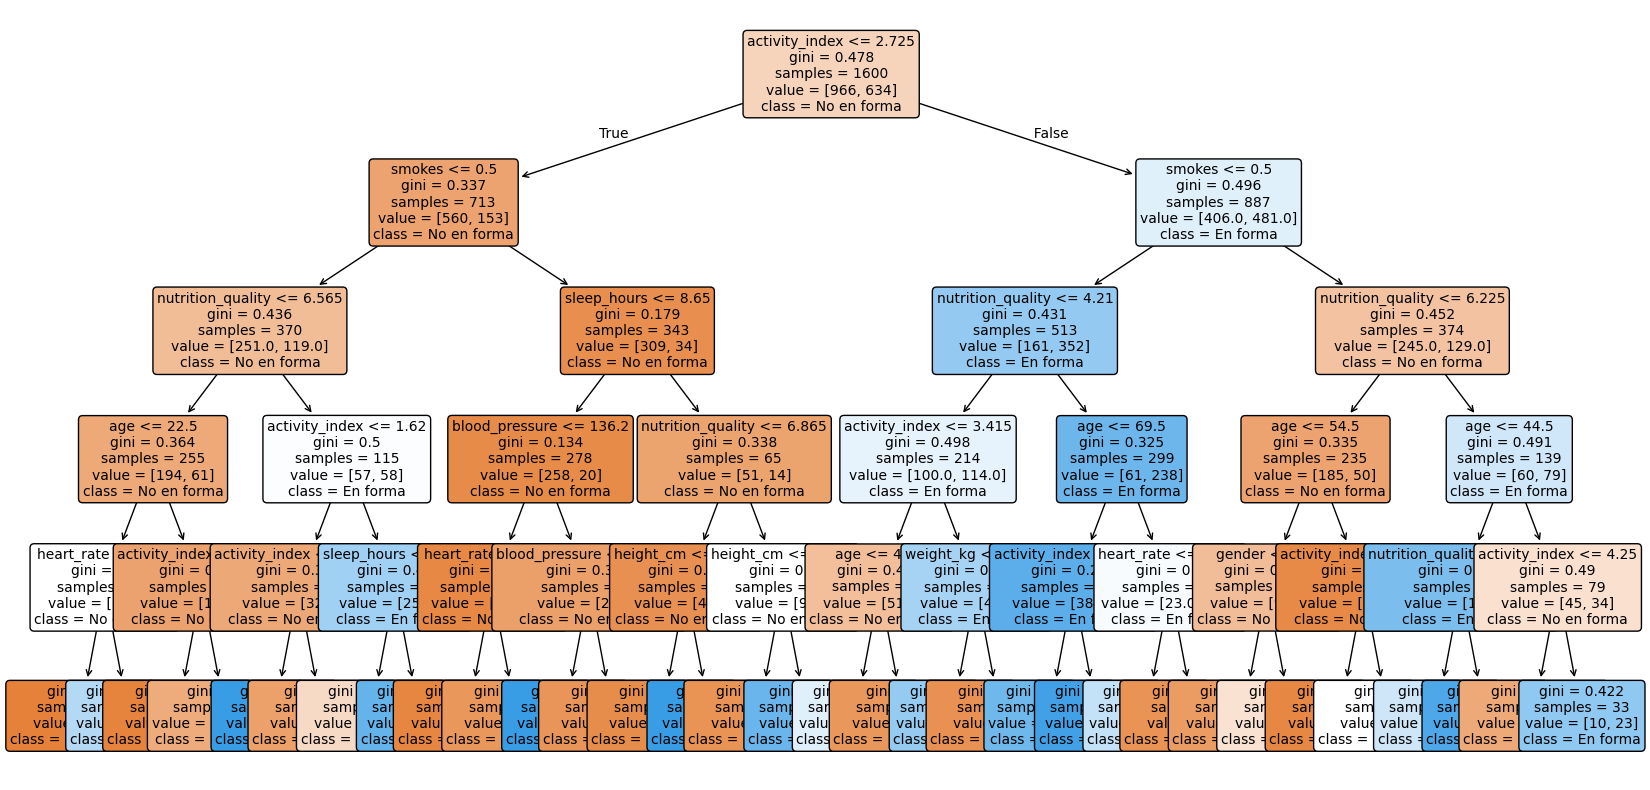

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(modelo, feature_names=X.columns, class_names=['No en forma','En forma'], filled=True, rounded=True, fontsize=10)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {'criterion': ['gini','entropy'], 'max_depth':[3,5,7]}
grid = GridSearchCV(DecisionTreeClassifier(random_state=1614006), params, cv=5, scoring='accuracy')
grid.fit(X_train, y_train)
print("Mejor params (gini/entropy):", grid.best_params_)
print("Mejor score CV:", grid.best_score_)

Mejor params (gini/entropy): {'criterion': 'entropy', 'max_depth': 5}
Mejor score CV: 0.735625


In [ ]:
ej = X_test.iloc[0:1]
print("Ejemplo (datos):")
display(ej)
print("Predicción (0=no,1=si):", grid.best_estimator_.predict(ej)[0])

Ejemplo (datos):


,age,height_cm,weight_kg,heart_rate,blood_pressure,sleep_hours,nutrition_quality,activity_index,smokes,gender
1860,57,196,115,58.4,92.1,8.1,2.33,4.55,1.0,1


Predicción (0=no,1=si): 0
